# Overview

 This is my first time participating in a Kaggle competition. I have used Kaggle as a learning resource in the past, and I am now determined to become a competitor myself.  

Much has been written about the Titanic competition on Kaggle. There are several wonderful notebook write ups, such as Alexis Cook's [Titanic Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial). Therefore, I will not belabor my introduction.  

That said, the Titanic Competition is a classification problem where we are tasked with predicting whether or not a passenger survived the ship's sinking. Doing well in the competition requires a healthy dose of domain context as well as standard modeling best practices. 

**Goal**: place in top the 10% of rolling leaderboard.

# Setup

In [22]:
# initial imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set the random seed state for reproducibility
random_state = 42

In [3]:
# import train and test set
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [4]:
# confirm train_df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# confirm test_df
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


---
# EDA

In [6]:
# get basic info on the train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# get basic info on the test_df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The *training data* has 891 rows and 11 columns. Survived is the **dependent variable**.

Our *test data* has 418 rows and 10 columns. ~32% of our overall data is in the test set.

**Data Dictionary:**
* PassengerId - int. Key.
* Survived - int. Survival. 0 = No, 1 = Yes. Boolean.
* Pclass - int. Ticket class.
* Name - str. Name of passenger.
* Sex - str. Sex of passenger.
* Age - float. Age of passenger. If age is estimated, takes xx.5. Has nulls.
* SibSp - int. # of siblings/spouses on board. 
* Parch - int. # of parents/ children aboard the titanic.
* Ticket - str. Ticket number.
* Fare - float. Fare paid by passenger. Has nulls.
* Cabin - str. Cabin of passenger. Has nulls.
* Embarked - str. Port of embarkation. C = Cherbourg, Q = Queenstown, S = Southampton. Has nulls.

**Initial Hypotheses:**
* Young children will survive.
* Young women will survive.
* Rich people will survive.
* Location on ship matters.
* Titles will or will not survive (depending on title).
* Larger families will not survive.

Percentage who survived: 38.38%


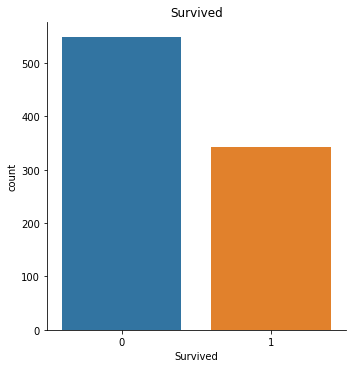

In [24]:
# Survived
sns.catplot(x='Survived', data=train_df, kind='count').set(title='Survived')
survived_perc = round((train_df['Survived'].sum()) / len(train_df.index) * 100,2)
print(f'Percentage who survived: {survived_perc}%')
plt.show()

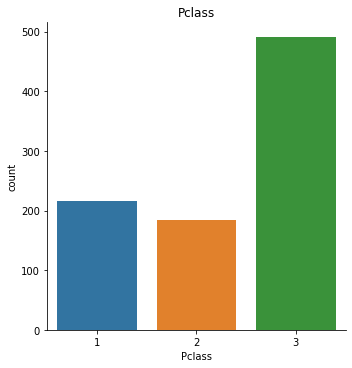

In [23]:
# PClass
sns.catplot(x='Pclass', data=train_df, kind='count').set(title='Pclass')
plt.show()

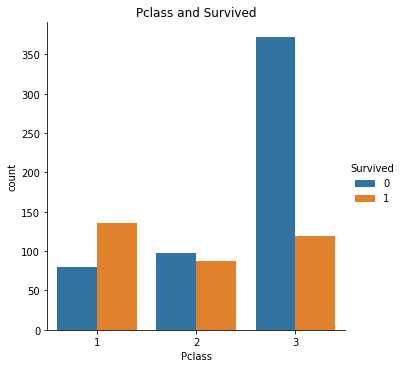

In [25]:
# PClass and Survived
sns.catplot(x='Pclass', hue='Survived', data=train_df, kind='count').set(title='Pclass and Survived')
plt.show()

As expected, Pclass appears to be correlated with survival.

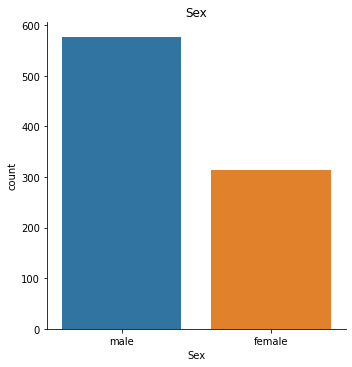

In [26]:
# Sex
sns.catplot(x='Sex', data=train_df, kind='count').set(title='Sex')
plt.show()

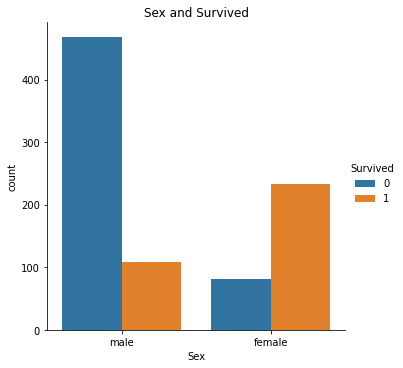

In [27]:
# Sex and Survived
sns.catplot(x='Sex', hue='Survived', data=train_df, kind='count').set(title='Sex and Survived')
plt.show()

**Insight**: Sex appears to be correlated with survival.

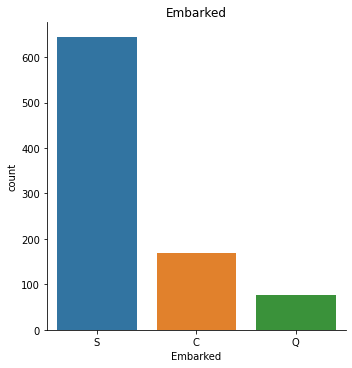

In [29]:
# Embarked
sns.catplot(x='Embarked', data=train_df, kind='count').set(title='Embarked')
plt.show()

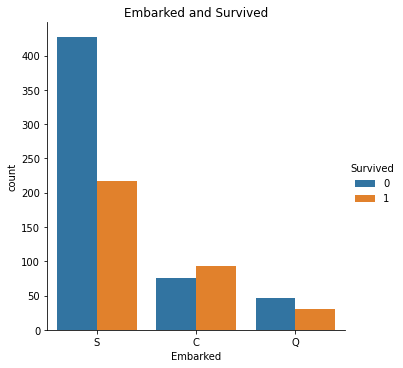

In [30]:
# Embarked and Survived
sns.catplot(x='Embarked', hue='Survived', data=train_df, kind='count').set(title='Embarked and Survived')
plt.show()

**Insight**: perhaps Embarked may be correlated with Pclass.

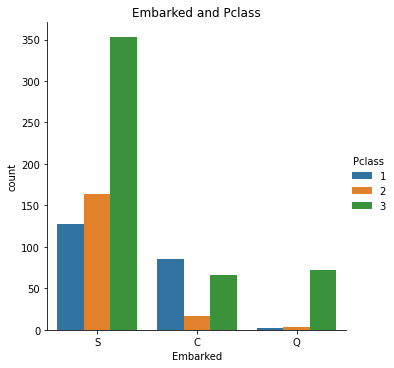

In [31]:
# Embarked and Pclass
sns.catplot(x='Embarked', hue='Pclass', data=train_df, kind='count').set(title='Embarked and Pclass')
plt.show()

**Insight**: S is disproportionately 3rd class. I would consider this a spurious correlation as Pclass is likely the underlying structure driving survival here.

In [34]:
# basic distributions of train_df
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
# basic distributions of test_df
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


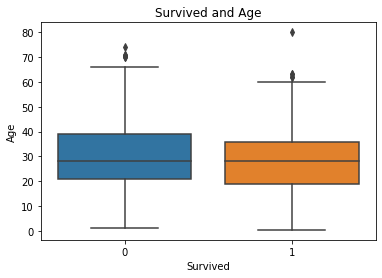

In [37]:
# Survived and Age
sns.boxplot(x='Survived', y='Age', data=train_df).set(title='Survived and Age')
plt.show()

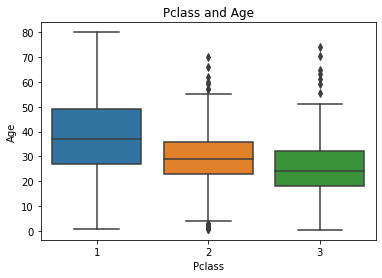

In [38]:
# Pclass and Age
sns.boxplot(x='Pclass', y='Age', data=train_df).set(title='Pclass and Age')
plt.show()

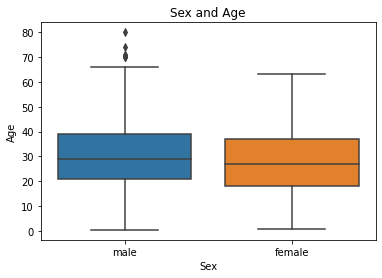

In [39]:
# Sex and Age
sns.boxplot(x='Sex', y='Age', data=train_df).set(title='Sex and Age')
plt.show()

Younger passengers were more likely to not survive than older passengers.  

It appears that 1st class passengers were disproportionately older. 2nd class passengers were also older than 3rd class.  

Male passengers were older than female passengers.  

In [ ]:
# Survived and SibSp
sns.boxplot(x='Survived', y='SibSp', data=train_df)

In [ ]:
# Survived and Parch
sns.boxplot(x='Survived', y='Parch', data=train_df)

It appears that SibSp relationship does not impact survival.  

It does appear that having a Parch relationship impacts survival.

---
# Modeling

In [ ]:
train_df.info()

In [ ]:
# make copies of original data
e_train_df = train_df.copy()
e_test_df = test_df.copy()

In [ ]:
# determine if Cabin is high cardinality
sns.catplot(x='Cabin', data=e_train_df, kind='count')

As you can see, Cabin is a high cardinality feature. We could either:
* impute it with 'missing' value
* try and get it from the Ticket.

In [ ]:
# see if there is a connection between Ticket and Cabin
e_train_df.loc[e_train_df['Cabin'].notnull(), ['Ticket', 'Cabin']].head(10)

Therefore, we cannot use Ticket to determine Cabin. What is likely occurring is that some tickets did not come with an assigned cabin.

In [ ]:
# categorical impute
e_train_df['Cabin'] = e_train_df['Cabin'].fillna('Missing') 
e_train_df['Embarked'] = e_train_df['Embarked'].fillna(e_train_df['Embarked'].mode()[0])

In [ ]:
# categorical impute
e_test_df['Cabin'] = e_test_df['Cabin'].fillna('Missing')
e_test_df['Embarked'] = e_test_df['Embarked'].fillna(e_test_df['Embarked'].mode()[0])

In [ ]:
# checking Age for distribution and outliers
sns.boxplot(x='Age', data=train_df)

In [ ]:
# checking Fare for distribution and outliers
sns.boxplot(x='Fare', data=train_df)

It appears that Age is relatively symmetrical and that Fare is right skewed. I will use **mean** imputation for Age and **median** imputation for Fare.

In [ ]:
# quantitative impute
e_train_df['Age'] = e_train_df['Age'].fillna(e_train_df['Age'].mean())
e_train_df['Fare'] = e_train_df['Fare'].fillna(e_train_df['Fare'].median())

In [ ]:
# quantitative impute
e_test_df['Age'] = e_test_df['Age'].fillna(e_test_df['Age'].mean())
e_test_df['Fare'] = e_test_df['Fare'].fillna(e_test_df['Fare'].median())

In [ ]:
# confirm the imputation worked
e_train_df.info()

In [ ]:
# confirm the imputation worked
e_test_df.info()

age_bucket = discretizing age into buckets.

In [ ]:
# age_bucket
age_bins = [0, 12, 18, 30, 65, 100]
age_labels = ['Child', 'Teen', 'Young Adult','Adult', 'Elderly']

e_train_df['age_bucket'] = pd.cut(x=e_train_df['Age'], bins=age_bins,
                    labels=age_labels).astype('object')

e_test_df['age_bucket'] = pd.cut(x=e_test_df['Age'], bins=age_bins,
                    labels=age_labels).astype('object')

I wonder how age_bucket interacts with survival.

In [ ]:
# ship_location and survived
sns.catplot(x='age_bucket', hue='Survived', data=e_train_df, kind='count')

It seems like most of the passengers on the Titanic were young adults.

title = Positions that accompany your name. Some may assist in survival (such as being royalty), while others might hurt it (such as being a military officer).

In [ ]:
# title
e_train_df[['last_name','intermediate']] = e_train_df['Name'].str.split(', ', expand=True)
e_train_df[['title','first_name']] = e_train_df['intermediate'].str.split('.', 1, expand=True)
e_train_df = e_train_df.drop(columns=['last_name', 'intermediate', 'first_name'])

e_test_df[['last_name','intermediate']] = e_test_df['Name'].str.split(', ', expand=True)
e_test_df[['title','first_name']] = e_test_df['intermediate'].str.split('.', 1, expand=True)
e_test_df = e_test_df.drop(columns=['last_name', 'intermediate', 'first_name'])

In [ ]:
# unique titles
train_title_set = set(e_train_df['title'].tolist())
test_title_set = set(e_test_df['title'].tolist())
title_sorted = sorted(train_title_set.union(test_title_set))

print(title_sorted)

I am going to bucket into "officer", "important", and "average".

In [ ]:
# assign titles to flags
def assign_role(row):
    if row['title'] in ['Capt', 'Col', 'Major']:
        return 'officer'
    elif row['title'] in ['Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Master', 'Rev', 'Sir', 'the Countess']:
        return 'important'
    elif row['title'] in ['Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms']:
        return 'average'
    
e_train_df['role'] = e_train_df.apply(lambda row: assign_role(row), axis=1)
e_test_df['role'] = e_test_df.apply(lambda row: assign_role(row), axis=1)

I wonder how role interacts with survival.

In [ ]:
# ship_location and survived
sns.catplot(x='role', hue='Survived', data=e_train_df, kind='count')

It appears that "important" increases chances of survival versus being an "officer" or "average".

ship_location = what specific area were you on the ship. I will use first letter of ticket to determine.

In [ ]:
# ship_location
train_cabin_set = set(e_train_df['Cabin'].tolist())
test_cabin_set = set(e_test_df['Cabin'].tolist())
cabins_sorted = sorted(train_cabin_set.union(test_cabin_set))
print(f'Cabins in sort order: {cabins_sorted}')

Some passengers have multiple cabins, but they all appear to be in the same general ship_location.

In [ ]:
# ship_location
e_train_df['ship_location'] = e_train_df['Cabin'].astype(str).str[0]
e_test_df['ship_location'] = e_test_df['Cabin'].astype(str).str[0]

I want to see if how ship location relates to survival and Pclass. 

In [ ]:
# ship_location and survived
sns.catplot(x='ship_location', hue='Survived', data=e_train_df, kind='count')

Some locations do appear to imply higher chances of survival. Also, this makes me think passenger class correlates with having been assigned a cabin.

In [ ]:
# ship_location and Pclass
sns.catplot(x='ship_location', hue='Pclass', data=e_train_df, kind='count')

Clearly passenger class correlates with both having been assigned a cabin.

family_size = The total amount of siblings, spouses, parents and children. The idea here is that larger families do not want to be split up, where as individuals can make more ruthless survi

In [ ]:
# family_size
e_train_df['family_size'] = e_train_df['SibSp'] + e_train_df['Parch']
e_test_df['family_size'] = e_test_df['SibSp'] + e_test_df['Parch']

I want to see how family_size relates to survival.

In [ ]:
# survival and family_size
sns.boxplot(x='Survived', y='family_size', data=e_train_df)

It appears like Parch, larger overall families survive more. This surprises me. I wonder if solo travelers survive more.

In [ ]:
# family_size and survived
sns.catplot(x='family_size', hue='Survived', data=e_train_df, kind='count')

It appears that solo travelers did not survive as much as those with small families. Larger families also appear to nto survive as much.

In [ ]:
# traveling alone
e_train_df['travel_solo'] = e_train_df.apply(lambda row: 1 if row['family_size']==0 else 0, axis=1)
e_test_df['travel_solo'] = e_test_df.apply(lambda row: 1 if row['family_size']==0 else 0, axis=1)

In [ ]:
e_train_df.info()

In [ ]:
e_test_df.info()

In [ ]:
# make a copy of enhanced dataframes for modeling
m_train_df = e_train_df.copy()
m_test_df = e_test_df.copy()

In [ ]:
# drop cols
drop_list = ['Name', 'Ticket', 'Cabin', 'title', 'family_size']
m_train_df.drop(columns=drop_list, inplace=True)
m_test_df.drop(columns=drop_list, inplace=True)

In [ ]:
# dummy variables
dummy_list = ['Pclass', 'Sex', 'Embarked', 'age_bucket', 'role', 'ship_location']
m_train_df = pd.get_dummies(m_train_df, columns=dummy_list)
m_test_df = pd.get_dummies(m_test_df, columns=dummy_list)

In [ ]:
m_train_df.info()

We need to confirm that our df have the same dimensions at this point

In [ ]:
m_test_df['ship_location_T'] = 0

In [ ]:
m_train_df['fare_pclass_solo_female'] = m_train_df['Fare'] * (m_train_df['Pclass_1'] + m_train_df['travel_solo'] + m_train_df['Sex_female'])
m_test_df['fare_pclass_solo_female'] = m_test_df['Fare'] * (m_test_df['Pclass_1'] + m_test_df['travel_solo'] + m_test_df['Sex_female'])

It appears our dummy_encoder missed 'ship_location_t' on the test set

In [ ]:
train_set = set(m_train_df.columns)
test_set = set(m_test_df.columns)

train_diff_set = test_set - train_set
test_diff_set = train_set - test_set
print(f'Missing columns in train: {train_diff_set}')
print(f'Missing columns in test: {test_diff_set}')

In [ ]:
# standardize
from sklearn.preprocessing import StandardScaler

standardize_list = ['Age', 'SibSp', 'Parch', 'Fare', 'fare_pclass_solo_female']

train_features = m_train_df[standardize_list]
train_scaler = StandardScaler().fit(train_features.values)
train_features = train_scaler.transform(train_features.values)

m_train_df[standardize_list] = train_features

test_features = m_test_df[standardize_list]
test_scaler = StandardScaler().fit(test_features.values)
test_features = test_scaler.transform(test_features.values)

m_test_df[standardize_list] = test_features

In [ ]:
m_train_df.info()

In [ ]:
m_test_df.info()

In [ ]:
# train test split on e_train_df
# from sklearn.model_selection import train_test_split
# m_train_df.drop(columns=['PassengerId'], inplace=True)
# train, test = train_test_split(m_train_df, test_size=0.2, random_state=seed)
# dependent_variable = 'Survived'

# y_train = train[dependent_variable].copy()
# x_train = train.drop([dependent_variable], axis=1)

# y_test = test[dependent_variable].copy()
# x_test = test.drop([dependent_variable], axis=1)

In [ ]:
dependent_variable = 'Survived'
m_train_df.drop(columns=['PassengerId'], inplace=True)
y_train = m_train_df[dependent_variable].copy()
x_train = m_train_df.drop(columns=[dependent_variable], axis=1).copy()

In [ ]:
# # use random CV and lightgbm
# from scipy import stats
# from sklearn.model_selection import RandomizedSearchCV
# from lightgbm import LGBMClassifier

# param_distributions = {
#     'n_estimators': stats.randint(100, 1000),
#     'learning_rate': stats.uniform(0.01, 0.59),
#     'subsample': stats.uniform(0.4, 0.6),
#     'num_leaves': stats.randint(5, 100),
#     'min_child_samples': stats.randint(100, 500),
#     'max_depth': [4, 6, 8],
#     'colsample_bytree': stats.uniform(0.5, 0.4),
#     'min_child_weight': [1, 2, 3]
# }

# model = LGBMClassifier(random_state=seed)

# search_model = RandomizedSearchCV(
#             model,
#             cv=10,
#             n_iter = 5,
#             scoring='f1',
#             error_score = 0, 
#             n_jobs = 4
#         )

# fitted_model = search_model.fit(x_train, y_train)

In [ ]:
x_train.head()

In [ ]:
# use random CV and xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    criterion='gini',
    n_estimators=1000,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='auto',
    oob_score=True,
    random_state=random_state,
    n_jobs=-1
)

fitted_model = model.fit(x_train, y_train)

In [ ]:
# from sklearn.metrics import accuracy_score
# pred_y_test = fitted_model.predict(x_test)

# accuracy_score = round(accuracy_score(y_test, pred_y_test), 4)
# print(f'Accuracy score: {accuracy_score}%')

---
# Submission

In [ ]:
m_test_df.info()

In [ ]:
# construct final
submission_df = pd.DataFrame()
submission_df['PassengerId'] = m_test_df['PassengerId'].copy()
m_test_df.drop(columns=['PassengerId'], inplace=True)
submission_df['Survived'] = fitted_model.predict(m_test_df)

In [ ]:
submission_df.head()

In [ ]:
submission_df.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")